# Знакомство со средой

In [1]:
from typing import *
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

In [2]:
env = gym.make("ALE/Assault-ram-v5", render_mode="rgb_array")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [3]:
env.action_space

Discrete(7)

In [4]:
env.observation_space

Box(0, 255, (128,), uint8)

In [5]:
env.reset()

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0,   6, 100, 100, 100,   0,   0,   0,   0,  88, 254,
          0,   0, 192,   0, 136, 252,   2,   2,   2,   2, 130, 130, 130,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,   0,   0,  16,  16,   0,
        253,   0, 127, 115, 100,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,   2, 130,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254, 144,  60,   0,   0,   0,   0,   0,  80, 254,   4, 207,  68,
          0,  10,   0,   4,   0,   0, 255, 248,   0,   0,  64,   0, 172,
          0,   0,   0,  15, 252, 157, 251,  64, 251, 112, 243], dtype=uint8),
 {'lives': 4, 'episode_frame_number': 0, 'frame_number': 0})

In [6]:
env.step(env.action_space.sample())

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0,   6, 100, 100, 100,   0, 198,   0,   0,   0, 253,
          0,   0, 192,   0, 136, 252,   2,  66, 194,  66, 194,  51, 194,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,  28,  28,  17,  17,   0,
        253,   0, 127,  51,  36,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,  66, 194,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254, 144,  60,   0,   0,   0,   0,   0,  80, 254,   4,  50,  72,
          0,  10,   0,   8,   0,   0, 255, 248,   0,   0,  64,   0, 154,
          0,   0,   0, 248, 251,  15, 252,  64, 251,   0, 245], dtype=uint8),
 0.0,
 False,
 False,
 {'lives': 4, 'episode_frame_number': 4, 'frame_number': 4})

/home/andrew/Projects/2024_1/machine_learning/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


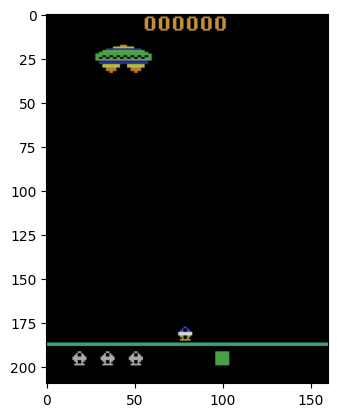

In [7]:
plt.imshow(env.render())

In [8]:
env.close()

In [8]:
env = gym.make("ALE/Assault-ram-v5")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [10]:
def eps_greedy_policy(n_action: int, eps: float, Q: Any) -> float:
    probabilities = torch.ones(n_action) * eps / n_action
    best_action = torch.argmax(Q).item()
    probabilities[best_action] += 1 - eps
    return torch.multinomial(torch.ones(len(probabilities)), 1).item()

In [11]:
env.reset()

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0,   6, 100, 100, 100,   0,   0,   0,   0,  88, 254,
          0,   0, 192,   0, 136, 252,   2,   2,   2,   2, 130, 130, 130,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,   0,   0,  16,  16,   0,
        253,   0, 127, 115, 100,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,   2, 130,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254, 144,  60,   0,   0,   0,   0,   0,  80, 254,   4, 207,  68,
          0,  10,   0,   4,   0,   0, 255, 248,   0,   0,  64,   0, 172,
          0,   0,   0,  15, 252, 157, 251,  64, 251, 112, 243], dtype=uint8),
 {'lives': 4, 'episode_frame_number': 0, 'frame_number': 0})

In [2]:
def step_print(string: str, iteration: int, step: int) -> None:
    if iteration % step == 0:
        print(string)

In [13]:
n_episodes = 100
n_action = 7

action_count = [0 for _ in range(n_action)]
action_total_reward = [0 for _ in range(n_action)]
action_avg_reward: list[list[float | None]] = [[] for _ in range(n_action)]

path: list[list[tuple[NDArray[np.uint8], int]]] = list() # state, action
rewards: list[float] = list()

eps: Final[float] = 0.2
Q = torch.zeros(n_action)

for episode in range(n_episodes):
    path.append([])
    env.reset()
    total_reward = 0.
    while True:
        action = eps_greedy_policy(n_action, eps, Q)
        state, reward, is_terminated, is_truncated, _ = env.step(action)

        action_count[action] += 1
        action_total_reward[action] += reward
        total_reward += reward

        Q[action] = action_total_reward[action] / action_count[action]
        for i in range(n_action):
            if action_count[i] != 0:
                action_avg_reward[i].append(action_total_reward[i] / action_count[i])
            else:
                action_avg_reward[i].append(None)
        path[-1].append([state, action])
        if is_terminated or is_truncated:
            break
    step_print(episode, episode, 10)
    rewards.append(total_reward)

0
10
20
30
40
50
60
70
80
90


In [14]:
Q

tensor([0.4707, 0.4310, 0.3700, 0.4219, 0.3938, 0.4076, 0.4343])

In [15]:
action_count, action_total_reward

([8165, 8234, 8117, 8064, 8212, 8295, 8027],
 [3843.0, 3549.0, 3003.0, 3402.0, 3234.0, 3381.0, 3486.0])

In [ ]:
path

In [17]:
rewards

[315.0,
 210.0,
 231.0,
 378.0,
 189.0,
 294.0,
 315.0,
 189.0,
 273.0,
 126.0,
 189.0,
 189.0,
 189.0,
 231.0,
 231.0,
 189.0,
 231.0,
 168.0,
 210.0,
 126.0,
 378.0,
 231.0,
 105.0,
 189.0,
 168.0,
 273.0,
 399.0,
 189.0,
 189.0,
 294.0,
 315.0,
 315.0,
 189.0,
 315.0,
 231.0,
 294.0,
 189.0,
 189.0,
 189.0,
 336.0,
 315.0,
 336.0,
 336.0,
 147.0,
 231.0,
 336.0,
 189.0,
 189.0,
 189.0,
 210.0,
 147.0,
 189.0,
 231.0,
 294.0,
 273.0,
 294.0,
 231.0,
 336.0,
 105.0,
 357.0,
 168.0,
 189.0,
 147.0,
 189.0,
 231.0,
 231.0,
 189.0,
 273.0,
 315.0,
 168.0,
 189.0,
 189.0,
 189.0,
 273.0,
 294.0,
 189.0,
 189.0,
 378.0,
 168.0,
 294.0,
 147.0,
 252.0,
 189.0,
 252.0,
 168.0,
 399.0,
 399.0,
 231.0,
 210.0,
 315.0,
 252.0,
 189.0,
 273.0,
 273.0,
 357.0,
 168.0,
 189.0,
 189.0,
 336.0,
 273.0]

In [18]:
rewards_mean = np.mean(rewards)
f"Точечная оценка: {rewards_mean}"

'Точечная оценка: 238.98'

In [19]:
unbiased_variance = np.sqrt(sum(np.power(np.array(rewards) - np.mean(rewards), 2)) / (len(rewards) - 1))
unbiased_variance

71.31010383592853

In [20]:
t = 0.99
t_y = 2.627
delta = t_y * unbiased_variance / np.sqrt(len(rewards))

In [21]:
f"Интервальная оценка: ({rewards_mean - delta}, {rewards_mean + delta})"

'Интервальная оценка: (220.24683572230157, 257.7131642776984)'

# Модель 1

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [127]:
env = gym.make("ALE/Assault-ram-v5")

In [70]:
class ActorCriticModel(nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: List[int], device: str = "cpu") -> None:
        super(ActorCriticModel, self).__init__()
        self.layers = [
            nn.Linear(n_input, n_hidden[0], device=device),
            nn.Linear(n_hidden[0], n_hidden[1], device=device),
            nn.Linear(n_hidden[1], n_hidden[2], device=device),
            nn.Linear(n_hidden[2], n_hidden[3], device=device)
        ]
        self.action = nn.Linear(n_hidden[-1], n_output, device=device)
        self.value = nn.Linear(n_hidden[-1], 1, device=device)
        self.device = device
        self.to(self.device)
    
    def forward(self, x: int) -> tuple[torch.Tensor, torch.Tensor]:
        x = torch.tensor(x, device=self.device)
        for layer in self.layers:
            x = F.relu(layer(x))
        action_probs = F.softmax(self.action(x), dim=-1).to(self.device)
        state_value = self.value(x)
        return action_probs, state_value

In [71]:
class PolicyNetwork:
    def __init__(self, n_state: int, n_actions: int, n_hidden: int, lr: float = 0.001) -> None:
        self.device = "cuda:0" if torch.cuda.is_available() else "cpu"
        self.model = ActorCriticModel(n_state, n_actions, n_hidden, self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=30, gamma=0.99)
    
    def predict(self, s: Any) -> Any:
        return self.model(torch.tensor(s, dtype=torch.float, device=self.device))
    
    def update(self, returns: torch.Tensor, log_probs, state_values) -> None:
        returns = returns.to(self.device)
        loss = 0
        for log_prob, value, Gt in zip(log_probs, state_values, returns):
            advantage = (Gt - value.item()).to(self.device)
            policy_loss = -log_prob * advantage
            value_loss = F.smooth_l1_loss(value, Gt)
            loss += policy_loss + value_loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def get_action(self, s) -> tuple:
        action_probs, state_value = self.predict(s)
        state_value = state_value.to(self.device)
        action = torch.multinomial(action_probs, 1).item()
        log_prob = torch.log(action_probs[action]).to(self.device)
        return action, log_prob, state_value

    def save(self, filename: str) -> None:
        torch.save(self.model.state_dict(), filename)
    
    def load(self, filename: str) -> Self:
        self.model.load_state_dict(torch.load(filename))

In [72]:
class PassivenessPenalty:
    def __init__(self, penalty: float, delay: int) -> None:
        self._delay = delay
        self._current_delay = 0
        self._penalty = penalty
    
    def increase(self) -> None:
        if self._current_delay < self._delay:
            self._current_delay += 1
    
    def decrease(self) -> None:
        self._current_delay = self._current_delay - 5 if self._current_delay > 5 else 0
    
    @property
    def penalty(self) -> float:
        return self._penalty * (self._current_delay / self._delay)

In [128]:
def actor_critic(env: gym.Env, estimator: PolicyNetwork, n_episode: int, gamma: float = 1.0) -> list[float]:
    passiveness_penalty = PassivenessPenalty(.1, 20)
    total_reward_episode = list()
    success_score = 0
    for episode in range(n_episode):
        total_penalty = 0. # debug
        eliminated = 0
        total_reward_episode.append(0)
        log_probs = []
        rewards = []
        state_values = []

        state, previous_info = env.reset(seed=0)
        previous_action = -1
        while True:
            action, log_prob, state_value = estimator.get_action(state)
            next_state, reward, is_done, is_truncated, info = env.step(action)

            if action in [3, 4] and action != previous_action:
                passiveness_penalty.decrease()
            else:
                passiveness_penalty.increase()
            
            eliminated += int(reward // 21)
            total_reward_episode[episode] += reward - passiveness_penalty.penalty
            if info.get("lives") < previous_info.get("lives"):
                reward -= 50
            total_penalty += passiveness_penalty.penalty
            log_probs.append(log_prob)
            state_values.append(state_value)
            rewards.append(reward)

            if is_truncated or is_done:
                returns = []
                Gt = 0
                pw = 0
                for reward in rewards[::-1]:
                    Gt += gamma ** pw * reward
                    returns.append(Gt)
                    pw += 1
                returns = returns[::-1]
                returns_amount = len(returns)
                returns = torch.tensor(returns)
                returns = (returns - returns.mean()) / (returns.std() + 1e-9)
                returns.resize_(returns_amount, 1)
                estimator.update(returns, log_probs, state_values)
                if True or total_reward_episode[episode] >= success_score:
                    estimator.scheduler.step()
                break

            state = next_state
            previous_action = action
            previous_info = info
        step_print(f"{episode}: {round(total_reward_episode[episode], 2)}, eliminated: {eliminated}, mean: {round(np.mean(total_reward_episode), 2)}, penalty: {-total_penalty}, lr: {estimator.optimizer.param_groups[0]['lr']}", episode, 1)
        passiveness_penalty.decrease()
    return total_reward_episode

In [186]:
estimator = PolicyNetwork(env.observation_space.shape[0], env.action_space.n, [1024, 128, 128, 128], 0.0002)

In [145]:
n_episodes = 100
gamma = .9

In [79]:
rewards: list[float] = list()

In [ ]:
rewards.extend(actor_critic(env, estimator, n_episodes, gamma))

(-300.0, 655.9063499999946)

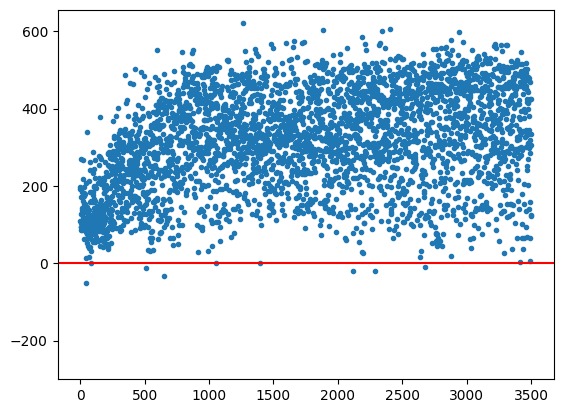

In [137]:
plt.plot(rewards, ".")
plt.axhline(color="red")
plt.ylim(bottom=-300)

In [54]:
env.close()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19492\1950625130.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, device=self.device)


0
5


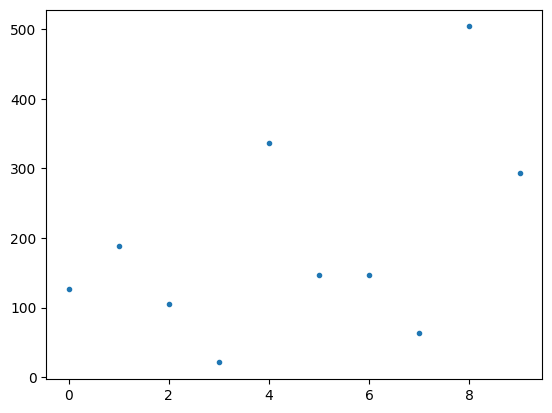

In [189]:
env = gym.make("ALE/Assault-ram-v5")

reward_history = list()

for episode in range(100):
    state = env.reset()[0]
    total_reward = 0
    while True:
        # print(state)
        action, _, _ = estimator.get_action(state)
        next_state, reward, is_done, is_truncated, _ = env.step(action)
        total_reward += reward

        if is_truncated or is_done:
            break

        state = next_state
    reward_history.append(total_reward)
    step_print(f"{episode}", episode, 5)

plt.plot(reward_history, ".")
env.close()

In [148]:
f"Mean: {np.mean(reward_history)}"

'Mean: 496.01'

In [142]:
env = gym.make("ALE/Assault-ram-v5", render_mode="human")
env.metadata["render_fps"] = 60

score_history: list[float] = [0]
state = env.reset()[0]

while True:
    # print(state)
    action, _, _ = estimator.get_action(state)
    next_state, reward, is_done, is_truncated, _ = env.step(action)
    score_history.append(score_history[-1] + reward)

    if is_truncated or is_done:
        break

    state = next_state
    env.render()

# plt.plot(score_history, ".")
env.close()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19492\1950625130.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, device=self.device)


На данный момент эта модель стремится к *"ленивой"* стратегии: корабль прячется в угол, стоит на месте и постоянно стреляет.

In [143]:
# estimator.save("actor1024_1.pt")

# Модель 2

In [149]:
env = gym.make("ALE/Assault-ram-v5")

In [151]:
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

In [152]:
class PPOMemory:
    def __init__(self, batch_size) -> None:
        self.states = []
        self.probs = []
        self.vals = []
        self.actions = []
        self.rewards = []
        self.dones = []

        self.batch_size = batch_size

    def generate_batches(self) -> tuple:
        n_states = len(self.states)
        batch_start = np.arange(0, n_states, self.batch_size)
        indices = np.arange(n_states, dtype=np.int64)
        np.random.shuffle(indices)
        batches = [indices [i:i + self.batch_size] for i in batch_start]

        return (np.array(self.states),
                np.array(self.actions),
                np.array(self.probs),
                np.array(self.vals),
                np.array(self.rewards),
                np.array(self.dones),
                batches)

    def store_memory(self, state, action, probs, vals, reward, done) -> None:
        self.states.append(state)
        self.actions.append(action)
        self.probs.append(probs)
        self.vals.append(vals)
        self.rewards.append(reward)
        self.dones.append(done)

    def clear_memory(self) -> None:
        self.states = []
        self.probs = []
        self.actions = []
        self.rewards = []
        self.dones = []
        self.vals = []

In [153]:
class ActorNetwork(nn.Module):
    def __init__(self, n_actions: int, input_dims: int, alpha: float, hidden_dims: list[int]) -> None:
        super(ActorNetwork, self).__init__()
        self.actor = nn.Sequential(
            nn.Linear(input_dims, hidden_dims[0]),
            nn.ReLU(),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.ReLU(),
            nn.Linear(hidden_dims[1], hidden_dims[2]),
            nn.ReLU(),
            nn.Linear(hidden_dims[2], hidden_dims[3]),
            nn.ReLU(),
            nn.Linear(hidden_dims[-1], n_actions),
            nn.Softmax(dim=-1)
        )

        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        dist = self.actor(state)
        dist = Categorical(logits=dist)

        return dist

    def save(self, filename: str) -> None:
        torch.save(self.state_dict(), filename)
    
    def load(self, filename: str) -> Self:
        self.load_state_dict(torch.load(filename))

In [154]:
class CriticNetwork(nn.Module):
    def __init__(self, input_dims, alpha, hidden_dims: list[int]):
        super(CriticNetwork, self).__init__()
        self.critic = nn.Sequential(
            nn.Linear(input_dims, hidden_dims[0]),
            nn.ReLU(),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.ReLU(),
            nn.Linear(hidden_dims[1], hidden_dims[2]),
            nn.ReLU(),
            nn.Linear(hidden_dims[2], hidden_dims[3]),
            nn.ReLU(),
            nn.Linear(hidden_dims[-1], 1)
        )

        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        value = self.critic(state)
        return value

    def save(self, filename: str) -> None:
        torch.save(self.state_dict(), filename)
    
    def load(self, filename: str) -> Self:
        self.load_state_dict(torch.load(filename))

In [163]:
class Agent:
    def __init__(self, n_actions, input_dims, gamma=0.99, alpha=0.0003, lambda_=0.95,
            policy_clip=0.1, batch_size=30, n_epochs=3) -> None:
        self.gamma = gamma
        self.policy_clip = policy_clip
        self.n_epochs = n_epochs
        self.gae_lambda = lambda_

        self.actor = ActorNetwork(n_actions, input_dims, alpha, [128, 64, 64, 32])
        self.critic = CriticNetwork(input_dims, alpha, [128, 64, 64, 32])
        self.memory = PPOMemory(batch_size)

    def remember(self, state, action, probs, vals, reward, done) -> None:
        self.memory.store_memory(state, action, probs, vals, reward, done)

    def save(self, filename: str) -> None:
        self.actor.save(f"actor_{filename}")
        self.critic.save(f"critic_{filename}")

    def load_models(self, filename: str) -> None:
        self.actor.load(f"actor_{filename}")
        self.critic.load(f"critic_{filename}")

    def choose_action(self, observation) -> tuple[torch.NumberType, torch.NumberType, torch.NumberType]:
        state = torch.tensor(np.array([observation]), dtype=torch.float).to(self.actor.device)

        dist = self.actor(state)
        value = self.critic(state)
        action = dist.sample()

        probs = torch.squeeze(dist.log_prob(action)).item()
        action = torch.squeeze(action).item()
        value = torch.squeeze(value).item()

        return action, probs, value

    def learn(self) -> None:
        for _ in range(self.n_epochs):
            state_arr, action_arr, old_prob_arr, vals_arr,\
            reward_arr, dones_arr, batches = \
                    self.memory.generate_batches()

            values = vals_arr
            advantage = np.zeros(len(reward_arr), dtype=np.float32)

            for t in range(len(reward_arr)-1):
                discount = 1
                a_t = 0
                for k in range(t, len(reward_arr)-1):
                    a_t += discount*(reward_arr[k] + self.gamma*values[k+1]*\
                            (1-int(dones_arr[k])) - values[k])
                    discount *= self.gamma*self.gae_lambda
                advantage[t] = a_t
            advantage = torch.tensor(advantage).to(self.actor.device)

            values = torch.tensor(values).to(self.actor.device)
            for batch in batches:
                states = torch.tensor(state_arr[batch], dtype=torch.float).to(self.actor.device)
                old_probs = torch.tensor(old_prob_arr[batch]).to(self.actor.device)
                actions = torch.tensor(action_arr[batch]).to(self.actor.device)

                dist = self.actor(states)
                critic_value = self.critic(states)

                critic_value = torch.squeeze(critic_value)

                new_probs = dist.log_prob(actions)
                prob_ratio = new_probs.exp() / old_probs.exp()
                #prob_ratio = (new_probs - old_probs).exp()
                weighted_probs = advantage[batch] * prob_ratio
                weighted_clipped_probs = torch.clamp(prob_ratio, 1 - self.policy_clip, 1 + self.policy_clip) * advantage[batch]
                actor_loss = -torch.min(weighted_probs, weighted_clipped_probs).mean()

                returns = advantage[batch] + values[batch]
                critic_loss = (returns-critic_value)**2
                critic_loss = critic_loss.mean()

                total_loss = actor_loss + 0.5*critic_loss
                self.actor.optimizer.zero_grad()
                self.critic.optimizer.zero_grad()
                total_loss.backward()
                self.actor.optimizer.step()
                self.critic.optimizer.step()

        self.memory.clear_memory()

In [171]:
def ppo_learning(env: gym.Env, estimator: Agent, n_episodes: int) -> list[int]:
    passiveness_penalty = PassivenessPenalty(.1, 20)
    reward_history = list()
    STEPS_TO_LEARN = 1500
    learning_steps = 0
    steps = 0
    for episode in range(n_episodes):
        eliminated = 0
        state, previous_info = env.reset()
        score = 0
        previous_action = -1
        while True:
            action, prob, value = estimator.choose_action(state)
            next_state, reward, is_terminated, is_truncated, info = env.step(action)
            
            if action in [3, 4] and action != previous_action:
                passiveness_penalty.decrease()
            else:
                passiveness_penalty.increase()
            eliminated += int(reward // 21)
            if info.get("lives") < previous_info.get("lives"):
                reward -= 50
            
            score += reward - passiveness_penalty.penalty
            estimator.remember(state, action, prob, value, reward, is_terminated or is_truncated)
            steps += 1
            if steps % STEPS_TO_LEARN == 0:
                estimator.learn()
                learning_steps += 1
            if is_terminated or is_truncated:
                break
            state = next_state
            previous_action = action
            previous_info = info
        reward_history.append(score)
        step_print(f"{episode}: {round(reward_history[episode], 2)}, eliminated: {eliminated}, mean: {round(np.mean(reward_history), 2)}, learning steps: {learning_steps}", episode, 1)
    return reward_history

In [119]:
env.observation_space.shape

(128,)

In [173]:
agent = Agent(env.action_space.n, env.observation_space.shape[0], alpha=0.0002)

In [172]:
rewards: list[float] = list()

In [174]:
env = gym.make("ALE/Assault-ram-v5")

In [177]:
rewards.extend(ppo_learning(env, agent, 150))

0: 117.07, eliminated: 16, mean: 117.07, learning steps: 0
1: 115.66, eliminated: 16, mean: 116.36, learning steps: 0
2: 2.84, eliminated: 11, mean: 78.52, learning steps: 1
3: 54.58, eliminated: 13, mean: 72.54, learning steps: 1
4: 244.69, eliminated: 22, mean: 106.97, learning steps: 2
5: 165.17, eliminated: 18, mean: 116.67, learning steps: 2
6: 138.53, eliminated: 17, mean: 119.79, learning steps: 2
7: 138.35, eliminated: 17, mean: 122.11, learning steps: 3
8: -29.56, eliminated: 9, mean: 105.26, learning steps: 3
9: 36.9, eliminated: 12, mean: 98.42, learning steps: 3
10: 147.07, eliminated: 18, mean: 102.85, learning steps: 4
11: 69.41, eliminated: 14, mean: 100.06, learning steps: 4
12: -46.43, eliminated: 8, mean: 88.79, learning steps: 5
13: -18.38, eliminated: 9, mean: 81.14, learning steps: 5
14: 40.79, eliminated: 12, mean: 78.45, learning steps: 5
15: 97.25, eliminated: 15, mean: 79.62, learning steps: 6
16: -24.5, eliminated: 9, mean: 73.5, learning steps: 6
17: 139.67, 

(-300.0, 361.184500000003)

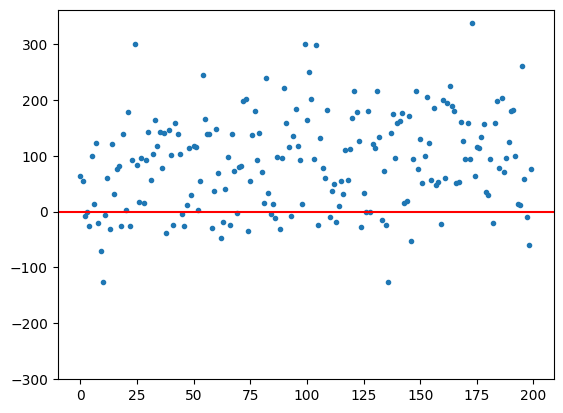

In [178]:
plt.plot(rewards, ".")
# plt.plot(np.poly1d(np.polyfit(range(len(rewards)), rewards, 2))(rewards))
plt.axhline(color="red")
plt.ylim(bottom=-300)

In [19]:
env.close()

0
25
50
75
100
125
150
175


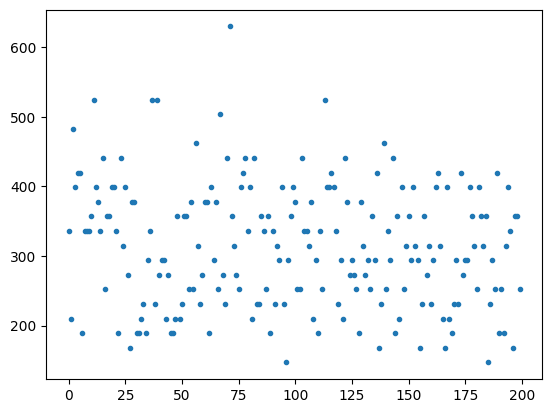

In [22]:
env = gym.make("ALE/Assault-ram-v5")

reward_history = list()

for episode in range(200):
    state = env.reset()[0]
    total_reward = 0
    while True:
        # print(state)
        action, _, _ = agent.choose_action(state)
        next_state, reward, is_done, is_truncated, _ = env.step(action)
        total_reward += reward

        if is_truncated or is_done:
            break

        state = next_state
    reward_history.append(total_reward)
    step_print(f"{episode}", episode, 25)

plt.plot(reward_history, ".")
env.close()

In [18]:
# realtime example

env = gym.make("ALE/Assault-ram-v5", render_mode="human")
env.metadata["render_fps"] = 60

score_history: list[float] = [0]
state = env.reset()[0]

while True:
    # print(state)
    action, _, _ = agent.choose_action(state)
    next_state, reward, is_done, is_truncated, _ = env.step(action)
    score_history.append(score_history[-1] + reward)

    if is_truncated or is_done:
        break

    state = next_state
    env.render()

# plt.plot(score_history, ".")
print(score_history)
env.close()